In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import euclidean_distances as euclidean
from sklearn.preprocessing import normalize as nm

#Configurando e Representando os Dados-----------------------------------------------------------------------------
data = pd.read_json('yelp_academic_dataset_business.json', lines = True)
newBase = data.loc[(data["city"]=="Las Vegas") & data["categories"].apply(lambda x: "Restaurants" in x)]
#Limpando a base de dados:
#Removendo dados que a princípio não são significativos para a analise do trabalho
newBase.drop(['city', 'open', 'state', 'type', 'business_id'], axis=1, inplace=True)

/home/necropsy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
#Gerada matriz categoria(binário)
new = newBase['categories'].tolist()
col = [];
for x in new:
    col = list(set(col+x))
categories = pd.DataFrame(columns = col)
i = 0
for restaurante in new:
    row = []
    for col in range(len(categories.columns)):
        aux = 1
        for tipo in restaurante:
            if(tipo == categories.columns[col]):
                row.insert(col,1)
                aux = 0
        if(aux == 1):
            row.insert(col,0)
    categories.loc[i] = row
    i += 1

new2 = pd.DataFrame(categories)

In [71]:
#Criando a matriz (latitude, longitude, categorias[binário])
left = newBase["latitude"].tolist()
left = pd.DataFrame(left, columns=['latitude'])
right = newBase["longitude"].tolist()
right = pd.DataFrame(right, columns=['longitude'])

result = pd.concat([left, right], axis=1)
result = pd.concat([result, new2], axis=1)

In [79]:
#Inserir o código do kmeans

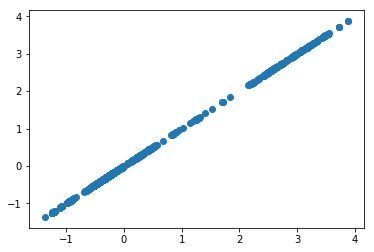

In [69]:
#Aplicando PCA e plotando
#porem ele ta aplicando o PCA na latitude e longitude também
#e acredito que isso não pode ser feito
from sklearn.decomposition import PCA

cols = list(result.columns)

pca = PCA(n_components=2, whiten=True)
dados_pca = pca.fit_transform(result[cols].values)
dados_pca = pd.DataFrame(dados_pca,columns=['comp1', 'comp2'])

plt.scatter(dados_pca['comp1'], dados_pca['comp1'],cmap=plt.cm.ocean)